
# Plotting CMIP5 precipitation
### pr_Amon_MRI-CGCM3_amip_r1i1p1_197901-200812.nc



Import packages:



In [ ]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
from matplotlib import cm


import geocat.datafiles as gdf
import geocat.viz as gv

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Read in data:



In [ ]:
# Open a netCDF data file using xarray default engine and load the data into xarrays, choosing the 2nd timestamp
IPSL_hist_data = xr.open_dataset('/Users/tflorio/Documents/GEOG459HW2b/IPSL_hist_DJF_tempC.nc')

In [ ]:
# display the dataset
IPSL_hist_data

<xarray.Dataset> Size: 84kB
Dimensions:  (time: 1, lon: 144, lat: 143)
Coordinates:
  * time     (time) datetime64[ns] 8B 1980-02-15T12:00:00
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 572B -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
    height   float64 8B ...
Data variables:
    tas      (time, lat, lon) float32 82kB ...
Attributes: (12/52)
    CDI:                    Climate Data Interface version 2.5.1 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    name:                   /ccc/work/cont003/gencmip6/p86denv/IGCM_OUT/IPSLC...
    creation_date:          2018-08-10T18:52:57Z
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          523ab9c7b70cfe3bc2c825d1e555e1d0
    model_version:          6.1.5
    history:                Wed Apr 30 10:19:55 2025: cdo subc,273.15 IPSL_hi...
    parent_variant_label:   r1i1p1f1
    CDO:                    Climate Data Operators version 2.5.1 (https://mpi...

In [ ]:
#display value
IPSL_hist_data.tas

<xarray.DataArray 'tas' (time: 1, lat: 143, lon: 144)> Size: 82kB
[20592 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 1980-02-15T12:00:00
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 572B -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
    height   float64 8B ...
Attributes:
    standard_name:       air_temperature
    long_name:           Near-Surface Air Temperature
    units:               K
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    description:         Near-Surface Air Temperature
    history:             none
    cell_measures:       area: areacella

In [ ]:
#take the mean (average) of precipitation over all time slices
#and convert to mm/day
#ds_mean = ds.mean(dim='time')*86400

#check the output - removed the time dimension
#ds_mean

In [ ]:
# How do we get rid of the stripe?

IPSL_temp_hist_cyclic, IPSL_hist_lon_cyclic = add_cyclic_point(IPSL_hist_data.tas, IPSL_hist_data['lon'])
IPSL_temp_hist_cyclic = IPSL_temp_hist_cyclic[0]  # Select the first time slice (time=0)

print(IPSL_temp_hist_cyclic.shape)

(143, 145)


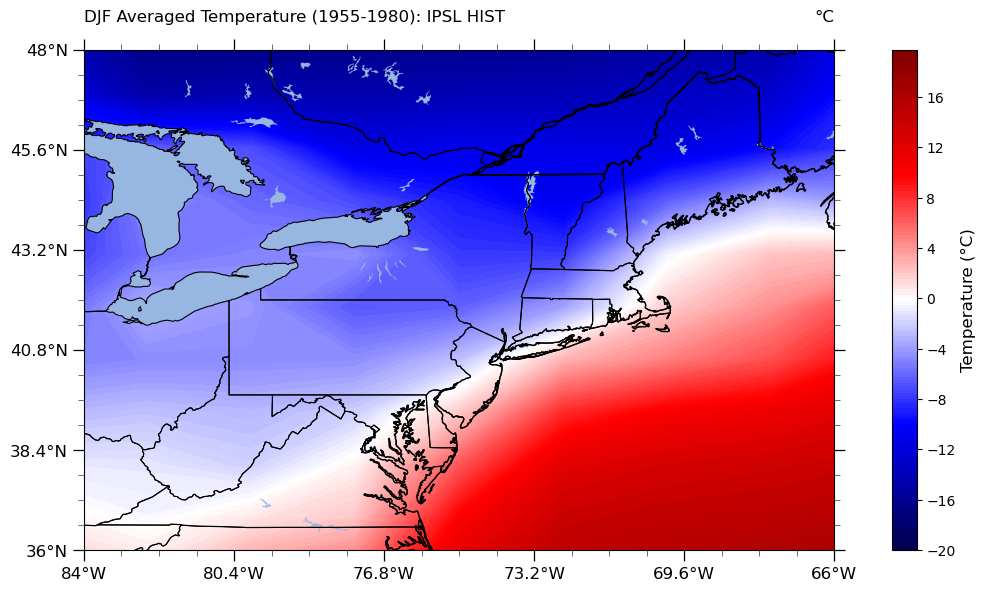

In [ ]:
# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Define a lat and lon min and max (your region)
lon_min = -84
lon_max = -66
lat_min = 36
lat_max = 48
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)

# Ensure levels are symmetric around zero
#levels = np.linspace(-max(abs(min_val), abs(max_val)), max(abs(min_val), abs(max_val)), 15)

levels = np.arange(-20, 20, 0.25)

# Draw filled contours
cs = ax.contourf(IPSL_hist_lon_cyclic, IPSL_hist_data['lat'], IPSL_temp_hist_cyclic,
                 transform=projection,
                 levels=levels,
                 cmap='seismic')  # Use a colormap that highlights positive and negative values

# Add coastlines, lakes, states (as needed)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name="admin_0_countries",
                                            scale="10m",
                                            facecolor="none",
                                            edgecolor="black"))

ax.add_feature(cfeature.LAKES.with_scale('10m'))

# If your region covers the US, you can add states
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)

# Use geocat.viz.util convenience function to set axes parameters without calling several matplotlib functions
gv.set_axes_limits_and_ticks(ax,
                             xlim=(lon_min, lon_max),
                             ylim=(lat_min, lat_max),
                             xticks=np.linspace(lon_min, lon_max, 6),
                             yticks=np.linspace(lat_min, lat_max, 6))

# Use geocat.viz.util convenience function to add tick lines
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gv.add_lat_lon_ticklabels(ax)

# Set the titles
gv.set_titles_and_labels(ax,
                         lefttitle="DJF Averaged Temperature (1955-1980): IPSL HIST",
                         lefttitlefontsize=12,
                         righttitle="°C",
                         righttitlefontsize=12)

# Set colorbar
cbar = plt.colorbar(cs)
cbar.set_label('Temperature (°C)', fontsize=12)  # Add label to colorbar

# Show plot
plt.tight_layout()
plt.show()

# Save the plot in PDF format
fig.savefig("IPSL_hist_NE_regional.pdf")


In [ ]:
# Open a netCDF data file using xarray default engine and load the data into xarrays, choosing the 2nd timestamp
IPSL_ssp585_data = xr.open_dataset('/Users/tflorio/Documents/GEOG459HW2b/IPSL_ssp585_DJF_tempC.nc')

In [ ]:
IPSL_ssp585_data.tas

<xarray.DataArray 'tas' (time: 1, lat: 143, lon: 144)> Size: 82kB
[20592 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2080-02-15T12:00:00
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 572B -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
    height   float64 8B ...
Attributes:
    standard_name:       air_temperature
    long_name:           Near-Surface Air Temperature
    units:               K
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    description:         near-surface (usually, 2 meter) air temperature
    history:             none
    cell_measures:       area: areacella

In [ ]:
# How do we get rid of the stripe?

IPSL_ssp585_temp_cyclic, IPSL_ssp585_lon_cyclic = add_cyclic_point(IPSL_ssp585_data.tas, IPSL_ssp585_data['lon'])
IPSL_ssp585_temp_cyclic = IPSL_ssp585_temp_cyclic[0]  # Select the first time slice (time=0)

print(IPSL_temp_hist_cyclic.shape)

(143, 145)


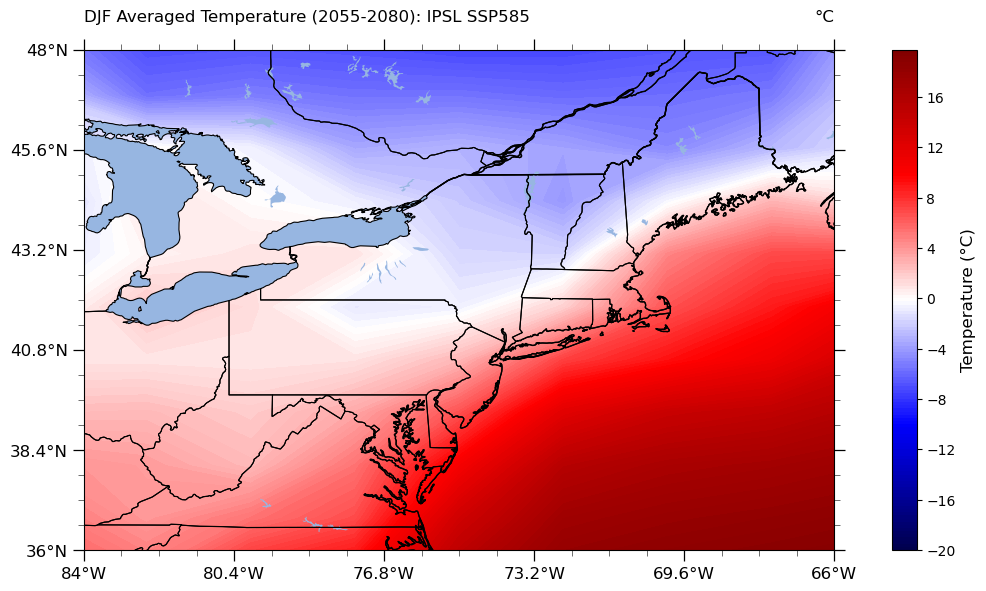

In [ ]:
# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Define a lat and lon min and max (your region)
lon_min = -84
lon_max = -66
lat_min = 36
lat_max = 48
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)

# Ensure levels are symmetric around zero
#levels = np.linspace(-max(abs(min_val), abs(max_val)), max(abs(min_val), abs(max_val)), 15)

levels = np.arange(-20, 20, 0.25)

# Draw filled contours
cs = ax.contourf(IPSL_ssp585_lon_cyclic, IPSL_ssp585_data['lat'], IPSL_ssp585_temp_cyclic,
                 transform=projection,
                 levels=levels,
                 cmap='seismic')  # Use a colormap that highlights positive and negative values

# Add coastlines, lakes, states (as needed)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name="admin_0_countries",
                                            scale="10m",
                                            facecolor="none",
                                            edgecolor="black"))

ax.add_feature(cfeature.LAKES.with_scale('10m'))

# If your region covers the US, you can add states
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)

# Use geocat.viz.util convenience function to set axes parameters without calling several matplotlib functions
gv.set_axes_limits_and_ticks(ax,
                             xlim=(lon_min, lon_max),
                             ylim=(lat_min, lat_max),
                             xticks=np.linspace(lon_min, lon_max, 6),
                             yticks=np.linspace(lat_min, lat_max, 6))

# Use geocat.viz.util convenience function to add tick lines
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gv.add_lat_lon_ticklabels(ax)

# Set the titles
gv.set_titles_and_labels(ax,
                         lefttitle="DJF Averaged Temperature (2055-2080): IPSL SSP585",
                         lefttitlefontsize=12,
                         righttitle="°C",
                         righttitlefontsize=12)

# Set colorbar
cbar = plt.colorbar(cs)
cbar.set_label('Temperature (°C)', fontsize=12)  # Add label to colorbar

# Show plot
plt.tight_layout()
plt.show()

# Save the plot in PDF format
fig.savefig("IPSL_ssp585_NE_regional.pdf")

In [ ]:
# Open a netCDF data file using xarray default engine and load the data into xarrays, choosing the 2nd timestamp
IPSL_model_diff = xr.open_dataset('/Users/tflorio/Documents/GEOG459HW2b/IPSL_model.diff.nc')

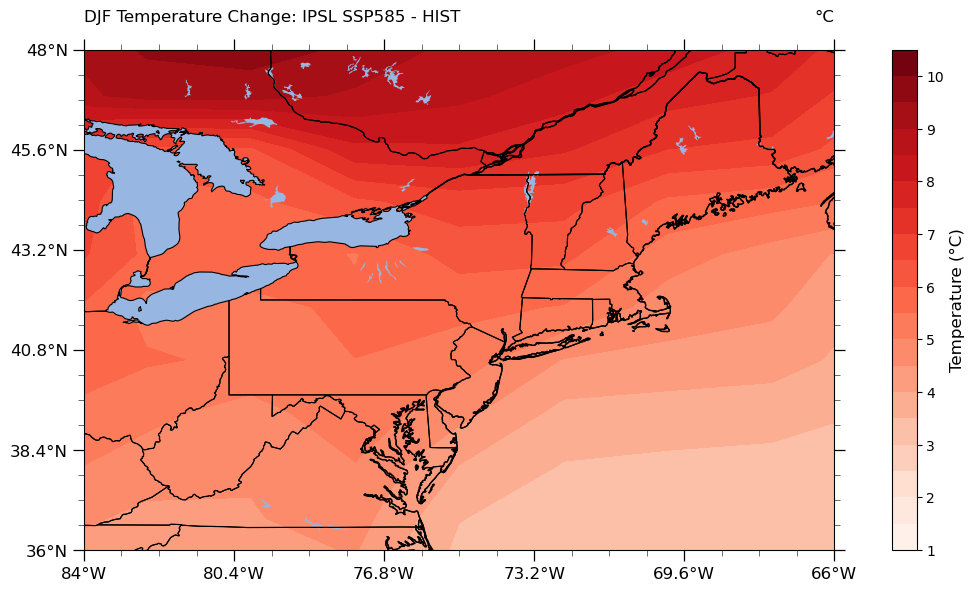

In [ ]:
IPSL_model_diff_cyclic, IPSL_model_diff_lon_cyclic = add_cyclic_point(IPSL_model_diff.tas, IPSL_model_diff['lon'])
IPSL_model_diff_cyclic = IPSL_model_diff_cyclic[0]  # Select the first time slice (time=0)

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Define a lat and lon min and max (your region)
lon_min = -84
lon_max = -66
lat_min = 36
lat_max = 48
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)

# Ensure levels are symmetric around zero
#levels = np.linspace(-max(abs(min_val), abs(max_val)), max(abs(min_val), abs(max_val)), 15)

levels = np.arange(1, 11, 0.5)

# Draw filled contours
cs = ax.contourf(IPSL_model_diff_lon_cyclic, IPSL_model_diff['lat'], IPSL_model_diff_cyclic,
                 transform=projection,
                 levels=levels,
                 cmap='Reds')  # Use a colormap that highlights positive and negative values

# Add coastlines, lakes, states (as needed)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name="admin_0_countries",
                                            scale="10m",
                                            facecolor="none",
                                            edgecolor="black"))

ax.add_feature(cfeature.LAKES.with_scale('10m'))

# If your region covers the US, you can add states
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)

# Use geocat.viz.util convenience function to set axes parameters without calling several matplotlib functions
gv.set_axes_limits_and_ticks(ax,
                             xlim=(lon_min, lon_max),
                             ylim=(lat_min, lat_max),
                             xticks=np.linspace(lon_min, lon_max, 6),
                             yticks=np.linspace(lat_min, lat_max, 6))

# Use geocat.viz.util convenience function to add tick lines
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gv.add_lat_lon_ticklabels(ax)

# Set the titles
gv.set_titles_and_labels(ax,
                         lefttitle="DJF Temperature Change: IPSL SSP585 - HIST",
                         lefttitlefontsize=12,
                         righttitle="°C",
                         righttitlefontsize=12)

# Set colorbar
cbar = plt.colorbar(cs)
cbar.set_label('Temperature (°C)', fontsize=12)  # Add label to colorbar

# Show plot
plt.tight_layout()
plt.show()

# Save the plot in PDF format
fig.savefig("IPSL_model_diff_NE_regional.pdf")

In [ ]:
# Open a netCDF data file using xarray default engine and load the data into xarrays, choosing the 2nd timestamp
MIROC6_hist_data = xr.open_dataset('/Users/tflorio/Documents/GEOG459HW2b/MIROC6_hist_DJF_tempC.nc')

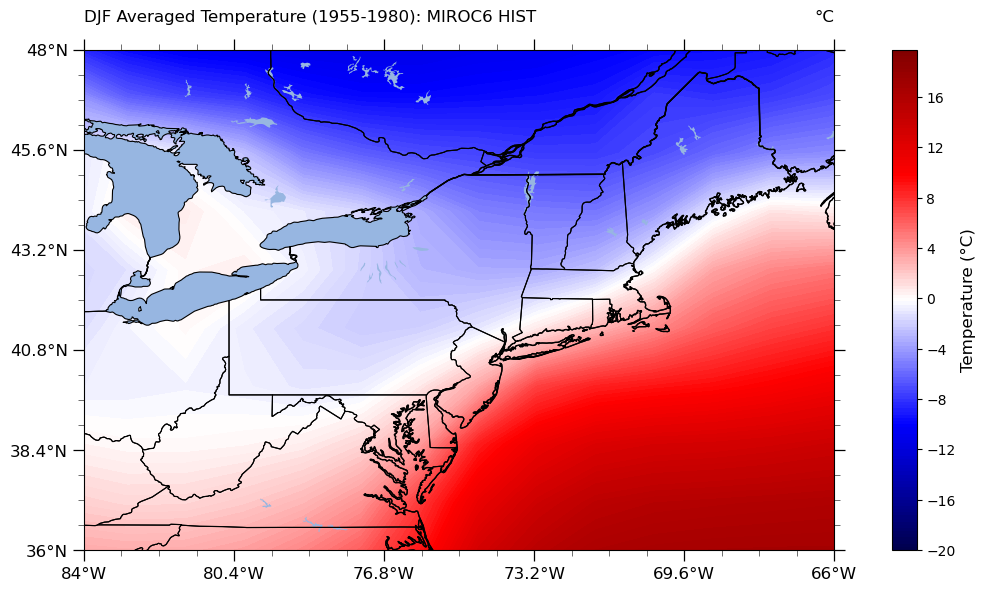

In [ ]:
MIROC6_hist_temp_cyclic, MIROC6_hist_temp_lon_cyclic = add_cyclic_point(MIROC6_hist_data.tas, MIROC6_hist_data['lon'])
MIROC6_hist_temp_cyclic = MIROC6_hist_temp_cyclic[0]  # Select the first time slice (time=0)

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Define a lat and lon min and max (your region)
lon_min = -84
lon_max = -66
lat_min = 36
lat_max = 48
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)

# Ensure levels are symmetric around zero
#levels = np.linspace(-max(abs(min_val), abs(max_val)), max(abs(min_val), abs(max_val)), 15)

levels = np.arange(-20, 20, 0.25)

# Draw filled contours
cs = ax.contourf(MIROC6_hist_temp_lon_cyclic, MIROC6_hist_data['lat'], MIROC6_hist_temp_cyclic,
                 transform=projection,
                 levels=levels,
                 cmap='seismic')  # Use a colormap that highlights positive and negative values

# Add coastlines, lakes, states (as needed)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name="admin_0_countries",
                                            scale="10m",
                                            facecolor="none",
                                            edgecolor="black"))

ax.add_feature(cfeature.LAKES.with_scale('10m'))

# If your region covers the US, you can add states
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)

# Use geocat.viz.util convenience function to set axes parameters without calling several matplotlib functions
gv.set_axes_limits_and_ticks(ax,
                             xlim=(lon_min, lon_max),
                             ylim=(lat_min, lat_max),
                             xticks=np.linspace(lon_min, lon_max, 6),
                             yticks=np.linspace(lat_min, lat_max, 6))

# Use geocat.viz.util convenience function to add tick lines
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gv.add_lat_lon_ticklabels(ax)

# Set the titles
gv.set_titles_and_labels(ax,
                         lefttitle="DJF Averaged Temperature (1955-1980): MIROC6 HIST",
                         lefttitlefontsize=12,
                         righttitle="°C",
                         righttitlefontsize=12)

# Set colorbar
cbar = plt.colorbar(cs)
cbar.set_label('Temperature (°C)', fontsize=12)  # Add label to colorbar

# Show plot
plt.tight_layout()
plt.show()

# Save the plot in PDF format
fig.savefig("MIROC6_HIST_NE_regional.pdf")

In [ ]:
# Open a netCDF data file using xarray default engine and load the data into xarrays, choosing the 2nd timestamp
MIROC6_ssp585_data = xr.open_dataset('/Users/tflorio/Documents/GEOG459HW2b/MIROC6_ssp585_DJF_tempC.nc')

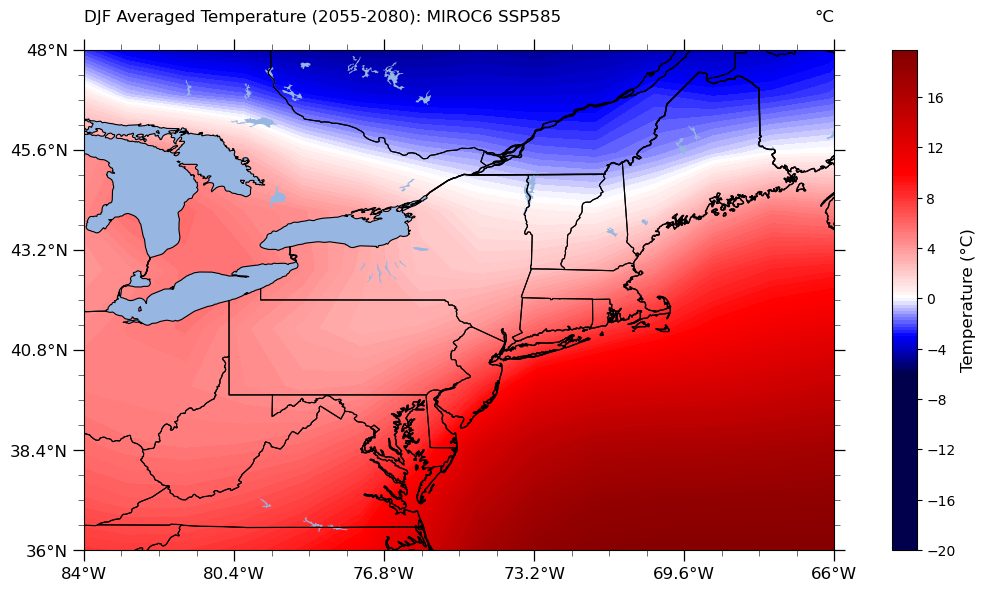

In [ ]:
MIROC6_ssp585_temp_cyclic, MIROC6_ssp585_temp_lon_cyclic = add_cyclic_point(MIROC6_ssp585_data.tas, MIROC6_ssp585_data['lon'])
MIROC6_ssp585_temp_cyclic = MIROC6_ssp585_temp_cyclic[0]  # Select the first time slice (time=0)

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Define a lat and lon min and max (your region)
lon_min = -84
lon_max = -66
lat_min = 36
lat_max = 48
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)

# Ensure levels are symmetric around zero
#levels = np.linspace(-max(abs(min_val), abs(max_val)), max(abs(min_val), abs(max_val)), 15)

levels = np.arange(-20, 20, 0.25)

# Draw filled contours
cs = ax.contourf(MIROC6_ssp585_temp_lon_cyclic, MIROC6_ssp585_data['lat'], MIROC6_ssp585_temp_cyclic,
                 transform=projection,
                 levels=levels,
                 cmap='seismic')  # Use a colormap that highlights positive and negative values

# Add coastlines, lakes, states (as needed)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name="admin_0_countries",
                                            scale="10m",
                                            facecolor="none",
                                            edgecolor="black"))

ax.add_feature(cfeature.LAKES.with_scale('10m'))

# If your region covers the US, you can add states
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)

# Use geocat.viz.util convenience function to set axes parameters without calling several matplotlib functions
gv.set_axes_limits_and_ticks(ax,
                             xlim=(lon_min, lon_max),
                             ylim=(lat_min, lat_max),
                             xticks=np.linspace(lon_min, lon_max, 6),
                             yticks=np.linspace(lat_min, lat_max, 6))

# Use geocat.viz.util convenience function to add tick lines
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gv.add_lat_lon_ticklabels(ax)

# Set the titles
gv.set_titles_and_labels(ax,
                         lefttitle="DJF Averaged Temperature (2055-2080): MIROC6 SSP585",
                         lefttitlefontsize=12,
                         righttitle="°C",
                         righttitlefontsize=12)

# Set colorbar
cbar = plt.colorbar(cs)
cbar.set_label('Temperature (°C)', fontsize=12)  # Add label to colorbar

# Show plot
plt.tight_layout()
plt.show()

# Save the plot in PDF format
fig.savefig("MIROC6_SSP585_NE_regional.pdf")

In [ ]:
MIROC6_model_diff = xr.open_dataset('/Users/tflorio/Documents/GEOG459HW2b/MIROC6_model.diff.nc')

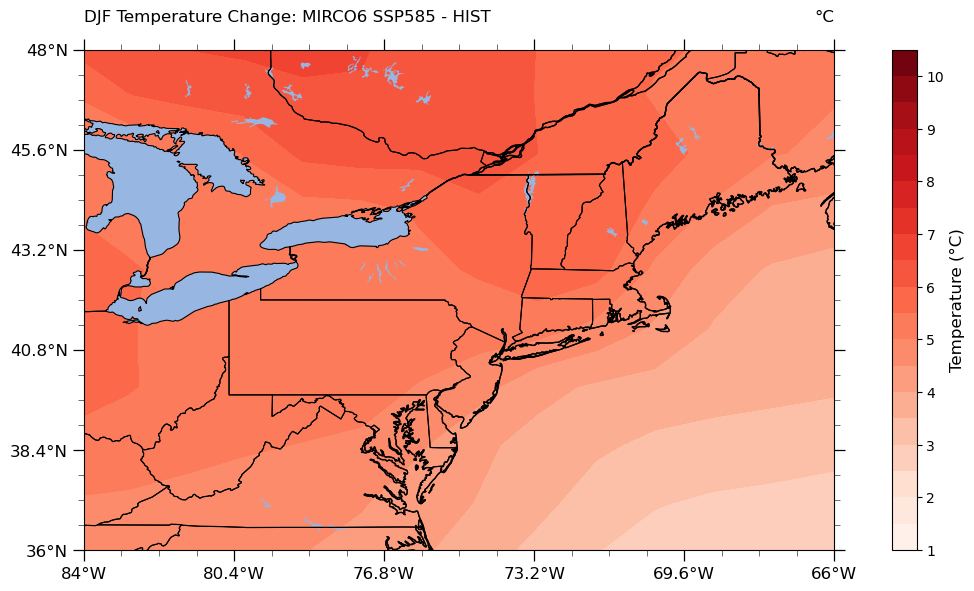

In [ ]:
MIROC6_model_diff_cyclic, MIROC6_model_diff_lon_cyclic = add_cyclic_point(MIROC6_model_diff.tas, MIROC6_model_diff['lon'])
MIROC6_model_diff_cyclic = MIROC6_model_diff_cyclic[0]  # Select the first time slice (time=0)

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Define a lat and lon min and max (your region)
lon_min = -84
lon_max = -66
lat_min = 36
lat_max = 48
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)

# Ensure levels are symmetric around zero
#levels = np.linspace(-max(abs(min_val), abs(max_val)), max(abs(min_val), abs(max_val)), 15)

levels = np.arange(1, 11, 0.5)

# Draw filled contours
cs = ax.contourf(MIROC6_model_diff_lon_cyclic, MIROC6_model_diff['lat'], MIROC6_model_diff_cyclic,
                 transform=projection,
                 levels=levels,
                 cmap='Reds')  # Use a colormap that highlights positive and negative values

# Add coastlines, lakes, states (as needed)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name="admin_0_countries",
                                            scale="10m",
                                            facecolor="none",
                                            edgecolor="black"))

ax.add_feature(cfeature.LAKES.with_scale('10m'))

# If your region covers the US, you can add states
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)

# Use geocat.viz.util convenience function to set axes parameters without calling several matplotlib functions
gv.set_axes_limits_and_ticks(ax,
                             xlim=(lon_min, lon_max),
                             ylim=(lat_min, lat_max),
                             xticks=np.linspace(lon_min, lon_max, 6),
                             yticks=np.linspace(lat_min, lat_max, 6))

# Use geocat.viz.util convenience function to add tick lines
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gv.add_lat_lon_ticklabels(ax)

# Set the titles
gv.set_titles_and_labels(ax,
                         lefttitle="DJF Temperature Change: MIRCO6 SSP585 - HIST",
                         lefttitlefontsize=12,
                         righttitle="°C",
                         righttitlefontsize=12)

# Set colorbar
cbar = plt.colorbar(cs)
cbar.set_label('Temperature (°C)', fontsize=12)  # Add label to colorbar

# Show plot
plt.tight_layout()
plt.show()

# Save the plot in PDF format
fig.savefig("MIROC6_model_diff_NE_regional.pdf")

In [ ]:
model_hist_ensmean_data = xr.open_dataset('/Users/tflorio/Documents/GEOG459HW2b/model_hist_ensmean_celsius.nc')


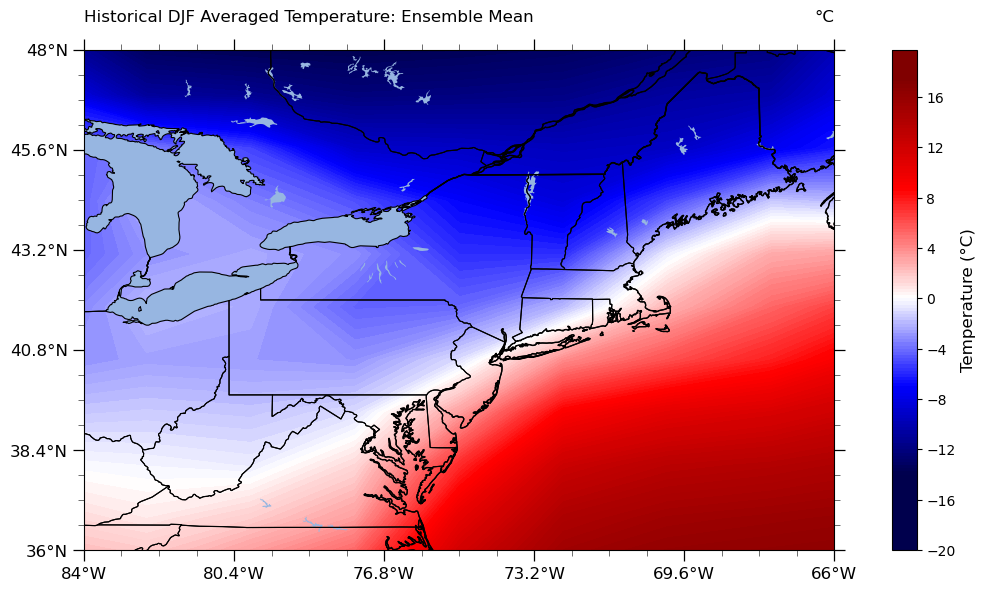

In [ ]:
# Apply cyclic point to handle longitude wrapping
model_hist_ensmean_cyclic, model_hist_ensmean_lon_cyclic = add_cyclic_point(model_hist_ensmean_data.tas, model_hist_ensmean_data['lon'])
model_hist_ensmean_cyclic = model_hist_ensmean_cyclic[0]  # Select the first time slice (time=0)

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Define a lat and lon min and max (your region)
lon_min = -84
lon_max = -66
lat_min = 36
lat_max = 48
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)

# Define the color normalization with TwoSlopeNorm (centered at 0°C)
norm = TwoSlopeNorm(vmin=-14, vcenter=0, vmax=17.5)

# Define custom levels for contours
levels = np.arange(-20, 20, 0.25)

# Draw filled contours with the defined levels and colormap
cs = ax.contourf(model_hist_ensmean_lon_cyclic, model_hist_ensmean_data['lat'], model_hist_ensmean_cyclic,
                 transform=projection,
                 levels=levels,
                 norm=norm,
                 cmap='seismic')  # Use a colormap that highlights positive and negative values

# Add coastlines, lakes, states (as needed)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name="admin_0_countries",
                                            scale="10m",
                                            facecolor="none",
                                            edgecolor="black"))

ax.add_feature(cfeature.LAKES.with_scale('10m'))

# If your region covers the US, you can add states
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)

# Use geocat.viz.util convenience function to set axes parameters without calling several matplotlib functions
gv.set_axes_limits_and_ticks(ax,
                             xlim=(lon_min, lon_max),
                             ylim=(lat_min, lat_max),
                             xticks=np.linspace(lon_min, lon_max, 6),
                             yticks=np.linspace(lat_min, lat_max, 6))

# Use geocat.viz.util convenience function to add tick lines
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gv.add_lat_lon_ticklabels(ax)

# Set the titles
gv.set_titles_and_labels(ax,
                         lefttitle="Historical DJF Averaged Temperature: Ensemble Mean",
                         lefttitlefontsize=12,
                         righttitle="°C",
                         righttitlefontsize=12)

# Set colorbar
cbar = plt.colorbar(cs)
cbar.set_label('Temperature (°C)', fontsize=12)  # Add label to colorbar

# Show plot
plt.tight_layout()
plt.show()

# Save the plot in PDF format
fig.savefig("model_ensmean_NE_regional.pdf")



In [ ]:
model_ssp585_ensmean_data = xr.open_dataset('/Users/tflorio/Documents/GEOG459HW2b/model_ssp585_ensmean_celsius.nc')

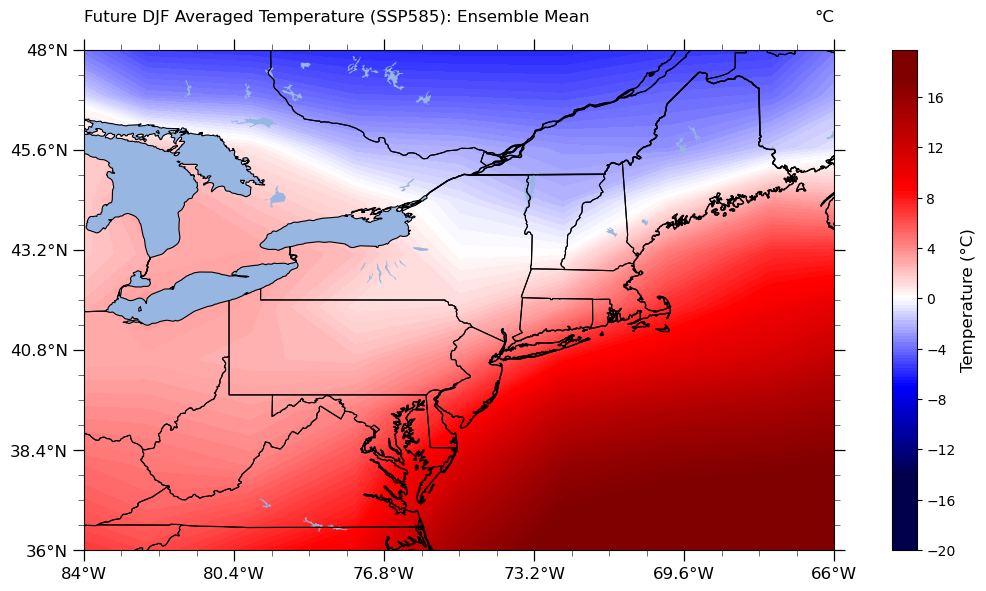

In [ ]:
from matplotlib.colors import TwoSlopeNorm

model_ssp585_ensmean_cyclic, model_ssp585_ensmean_lon_cyclic = add_cyclic_point(model_ssp585_ensmean_data.tas, model_ssp585_ensmean_data['lon'])
model_ssp585_ensmean_cyclic = model_ssp585_ensmean_cyclic[0]  # Select the first time slice (time=0)

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Define a lat and lon min and max (your region)
lon_min = -84
lon_max = -66
lat_min = 36
lat_max = 48
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)

# Ensure levels are symmetric around zero
#levels = np.linspace(-max(abs(min_val), abs(max_val)), max(abs(min_val), abs(max_val)), 15)

levels = np.arange(-20, 20, 0.25)

# Draw filled contours
cs = ax.contourf(model_ssp585_ensmean_lon_cyclic, model_ssp585_ensmean_data['lat'], model_ssp585_ensmean_cyclic,
                 transform=projection,
                 levels=levels,
                 norm = norm,
                 cmap='seismic')  # Use a colormap that highlights positive and negative values

# Add coastlines, lakes, states (as needed)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name="admin_0_countries",
                                            scale="10m",
                                            facecolor="none",
                                            edgecolor="black"))

ax.add_feature(cfeature.LAKES.with_scale('10m'))

# If your region covers the US, you can add states
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)

# Use geocat.viz.util convenience function to set axes parameters without calling several matplotlib functions
gv.set_axes_limits_and_ticks(ax,
                             xlim=(lon_min, lon_max),
                             ylim=(lat_min, lat_max),
                             xticks=np.linspace(lon_min, lon_max, 6),
                             yticks=np.linspace(lat_min, lat_max, 6))

# Use geocat.viz.util convenience function to add tick lines
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gv.add_lat_lon_ticklabels(ax)

# Set the titles
gv.set_titles_and_labels(ax,
                         lefttitle="Future DJF Averaged Temperature (SSP585): Ensemble Mean",
                         lefttitlefontsize=12,
                         righttitle="°C",
                         righttitlefontsize=12)

# Set colorbar
cbar = plt.colorbar(cs)
cbar.set_label('Temperature (°C)', fontsize=12)  # Add label to colorbar

# Show plot
plt.tight_layout()
plt.show()

# Save the plot in PDF format
fig.savefig("model_ensmean_SSP585_NE_regional.pdf")

In [ ]:
model_ens_bias_data = xr.open_dataset('/Users/tflorio/Documents/GEOG459HW2b/model_ens_bias.nc')

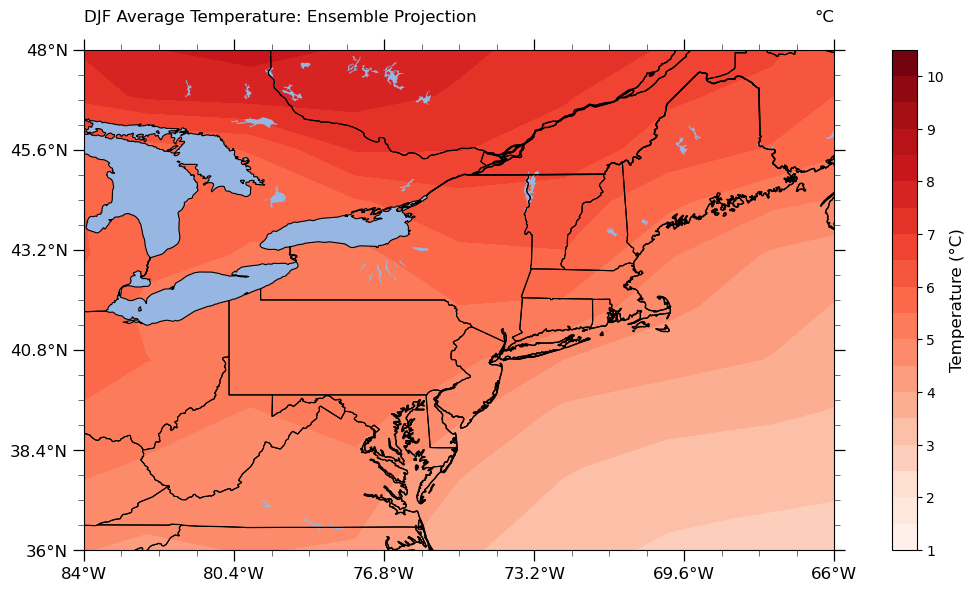

In [ ]:
model_ens_bias_cyclic, model_ens_bias_lon_cyclic = add_cyclic_point(model_ens_bias_data.tas, model_ens_bias_data['lon'])
model_ens_bias_cyclic = model_ens_bias_cyclic[0]  # Select the first time slice (time=0)

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Define a lat and lon min and max (your region)
lon_min = -84
lon_max = -66
lat_min = 36
lat_max = 48
ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)

# Ensure levels are symmetric around zero
#levels = np.linspace(-max(abs(min_val), abs(max_val)), max(abs(min_val), abs(max_val)), 15)

levels = np.arange(1, 11, 0.5)

# Draw filled contours
cs = ax.contourf(model_ens_bias_lon_cyclic, model_ens_bias_data['lat'], model_ens_bias_cyclic,
                 transform=projection,
                 levels=levels,
                 cmap='Reds')  # Use a colormap that highlights positive and negative values

# Add coastlines, lakes, states (as needed)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                            name="admin_0_countries",
                                            scale="10m",
                                            facecolor="none",
                                            edgecolor="black"))

ax.add_feature(cfeature.LAKES.with_scale('10m'))

# If your region covers the US, you can add states
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)

# Use geocat.viz.util convenience function to set axes parameters without calling several matplotlib functions
gv.set_axes_limits_and_ticks(ax,
                             xlim=(lon_min, lon_max),
                             ylim=(lat_min, lat_max),
                             xticks=np.linspace(lon_min, lon_max, 6),
                             yticks=np.linspace(lat_min, lat_max, 6))

# Use geocat.viz.util convenience function to add tick lines
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gv.add_lat_lon_ticklabels(ax)

# Set the titles
gv.set_titles_and_labels(ax,
                         lefttitle="DJF Average Temperature: Ensemble Projection",
                         lefttitlefontsize=12,
                         righttitle="°C",
                         righttitlefontsize=12)

# Set colorbar
cbar = plt.colorbar(cs)
cbar.set_label('Temperature (°C)', fontsize=12)  # Add label to colorbar

# Show plot
plt.tight_layout()
plt.show()

# Save the plot in PDF format
fig.savefig("ensmean_bias_NE_regional.pdf")